# 1. Initial Setup

## 1.1 Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 1.2. Setup Path

In [ ]:
TENSORFLOW_PATH = '/content/gdrive/MyDrive/Alegria-Object-Detection/TensorFlow/'
WORKSPACE_PATH = TENSORFLOW_PATH+'workspace'
SCRIPTS_PATH = TENSORFLOW_PATH+'scripts/preprocessing'
APIMODEL_PATH = TENSORFLOW_PATH+'models'
MODEL_RESEARCH_PATH = APIMODEL_PATH+'/research'

# To change workspace, edit this-
CURRENT_WORKSPACE_PATH = WORKSPACE_PATH+'/training_demo'

ANNOTATION_PATH = CURRENT_WORKSPACE_PATH+'/annotations'
IMAGE_PATH = CURRENT_WORKSPACE_PATH+'/images'

# Model from TensorFlow Model Zoo
MODEL_NAME = 'my_ssdmobnet'
FULL_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'

MODEL_PATH = CURRENT_WORKSPACE_PATH+'/models'
PRETRAINED_MODEL_PATH = CURRENT_WORKSPACE_PATH+'/pre-trained-models'
CONFIG_PATH = MODEL_PATH+'/'+MODEL_NAME+'/pipeline.config'
CHECKPOINT_PATH = MODEL_PATH+'/'+MODEL_NAME

# 2. TensorFlow Installation

## 2.1. Download TensorFlow Model Garden


In [ ]:
#cd into the TensorFlow directory in your Google Drive
%cd $TENSORFLOW_PATH 
!git clone https://github.com/tensorflow/models.git 

/content/gdrive/.shortcut-targets-by-id/1-Pmys3aSiNa1iA7InpJmH1xOyekt2The/Alegria-Object-Detection/TensorFlow
fatal: destination path 'models' already exists and is not an empty directory.


## 2.2. Install some required libraries and tools

In [ ]:
!apt-get install protobuf-compiler python-lxml python-pil
!pip install Cython pandas tf-slim lvis

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-lxml is already the newest version (4.2.1-1ubuntu0.6).
python-pil is already the newest version (5.1.0-1ubuntu0.7).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


## 2.3. Compile the Protobuf libraries


In [ ]:
#cd into 'TensorFlow/models/research'
%cd $MODEL_RESEARCH_PATH
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/.shortcut-targets-by-id/1-Pmys3aSiNa1iA7InpJmH1xOyekt2The/Alegria-Object-Detection/TensorFlow/models/research


## 2.4. Set the environment

In [ ]:
import os
import sys
os.environ['PYTHONPATH']+=APIMODEL_PATH
sys.path.append(MODEL_RESEARCH_PATH)

## 2.5. Build and Install setup.py


In [ ]:
!pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI

  Cloning https://github.com/philferriere/cocoapi.git to /tmp/pip-req-build-lsy4ryuk
  Running command git clone -q https://github.com/philferriere/cocoapi.git /tmp/pip-req-build-lsy4ryuk
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=264409 sha256=32cd28f76b7f979587186f387e37c69abc3cf85309d66db93ed1775cadf53822
  Stored in directory: /tmp/pip-ephem-wheel-cache-ozcny7k7/wheels/6b/c6/c5/cb6da4cb793a6cb1ab91f6578d76c42686422127eb4dbcea94
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.4
    Uninstalling pycocotools-2.0.4:
      Successfully uninstalled pycocotools-2.0.4


In [ ]:
%cd $MODEL_RESEARCH_PATH
!cp object_detection/packages/tf2/setup.py .

/content/gdrive/.shortcut-targets-by-id/1-Pmys3aSiNa1iA7InpJmH1xOyekt2The/Alegria-Object-Detection/TensorFlow/models/research


In [ ]:
!python setup.py build
!python setup.py install

running build
running build_py
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/bipartite_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_predictor_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/calibration_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/center_net_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/eval_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/flexible_grid_anchor_generator_pb2.py -> 

In [ ]:
# !python -m pip install .

In [ ]:
!python -c "import tensorflow as tf;print(tf.reduce_sum(tf.random.normal([1000, 1000])))"

2022-04-25 20:40:17.766020: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
tf.Tensor(-289.546, shape=(), dtype=float32)


## 2.6. Test the Installation

In [ ]:
#cd into 'TensorFlow/models/research/object_detection/builders/'
%cd $MODEL_RESEARCH_PATH'/object_detection/builders/'

!python model_builder_tf2_test.py

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
print('Done')

/content/gdrive/.shortcut-targets-by-id/1-Pmys3aSiNa1iA7InpJmH1xOyekt2The/Alegria-Object-Detection/TensorFlow/models/research/object_detection/builders
Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-04-25 20:41:16.706952: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0425 20:41:16.938427 140390665336704 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.31s
I0425 20:41:17.312695 140390665336704 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.31s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:te

# 3. Create Dataset and Setup Model

## 3.1 Create Label Map

In [ ]:
classes = [
       'apple',
       'orange',
       'banana',    
]

labels = []
i = 1
for line in classes:
    labels.append({'name': '{}'.format(line.strip()), 'id':'{}'.format(i)})
    i+=1
    
print(labels)

with open(ANNOTATION_PATH + '/label_map.pbtxt', 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

[{'name': 'apple', 'id': '1'}, {'name': 'orange', 'id': '2'}, {'name': 'banana', 'id': '3'}]


## 3.2. Download pretrained model from TensorFlow Model Zoo for Transfer Learning

Visit here to select a model from the TensorFlow Object Detection model zoo.

> https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

For now we'll be 

> http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

In [ ]:
!cd {PRETRAINED_MODEL_PATH} && tar -zxvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 4. Prepare Dataset

## 4.1. Install labelImg in local system

1. Create a new folder named Alegria-Object-Detection
2. Open cmd and execute the following:
```
  pip3 install labelImg
```


## 4.2. Download Images and Setup Folder Structure
1. In Alegria-Object-Detection create a folder named images
2. In images create 2 folders: test, train
3. Download prelabeled images from here: https://drive.google.com/file/d/1IVsy6PhB2PN6R14uyrxVcelSA20-AAZD/view?usp=sharing

## 4.3. Label Images
  1. Open labelImg/data/predefined_classes.txt and remove all existing classes and add these lines:
  ```
    apple
    orange
    banana
  ```
  2. Open cmd and execute the following:
```
  labelImg
```
  3. After labeling, split the images with annotations into 80-20 split (80% in train and 20% in test)
  4. Upload images folder into MyDrive/Alegria-Object-Detection/TensorFlow/workspace/${CURRENT_WORKSPACE} 

 

# 5. Training the Model

## 5.1. Generate TFRecords

In [ ]:
#cd into preprocessing directory
%cd $SCRIPTS_PATH

#run the cell to generate test.record and train.record
!python generate_tfrecord.py -x $IMAGE_PATH'/train' -l $ANNOTATION_PATH'/label_map.pbtxt' -o $ANNOTATION_PATH'/train.record'
!python generate_tfrecord.py -x $IMAGE_PATH'/test' -l $ANNOTATION_PATH'/label_map.pbtxt' -o $ANNOTATION_PATH'/test.record'

# !python generate_tfrecord.py -x '[path_to_train_folder]' -l '[path_to_annotations_folder]/label_map.pbtxt' -o '[path_to_annotations_folder]/train.record'
# !python generate_tfrecord.py -x '[path_to_test_folder]' -l '[path_to_annotations_folder]/label_map.pbtxt' -o '[path_to_annotations_folder]/test.record'

/content/gdrive/.shortcut-targets-by-id/1-Pmys3aSiNa1iA7InpJmH1xOyekt2The/Alegria-Object-Detection/TensorFlow/scripts/preprocessing
Successfully created the TFRecord file: /content/gdrive/MyDrive/Alegria-Object-Detection/TensorFlow/workspace/training_demo/annotations/train.record
Successfully created the TFRecord file: /content/gdrive/MyDrive/Alegria-Object-Detection/TensorFlow/workspace/training_demo/annotations/test.record


## 5.2. Configure the Pipeline file

In [ ]:
%cd $MODEL_PATH'/'$MODEL_NAME
!cp $PRETRAINED_MODEL_PATH'/'$FULL_MODEL_NAME'/pipeline.config' . 

/content/gdrive/.shortcut-targets-by-id/1-Pmys3aSiNa1iA7InpJmH1xOyekt2The/Alegria-Object-Detection/TensorFlow/workspace/training_demo/models/my_ssdmobnet


In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
CONFIG_PATH = MODEL_PATH+'/'+MODEL_NAME+'/pipeline.config'

In [ ]:
config = config_util.get_configs_from_pipeline_file(CONFIG_PATH)

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(CONFIG_PATH, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)

**Model finetuning**
> More info here https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network


In [ ]:
pipeline_config.model.ssd.num_classes = 2
pipeline_config.train_config.batch_size = 12
pipeline_config.train_config.fine_tune_checkpoint = PRETRAINED_MODEL_PATH+'/'+FULL_MODEL_NAME+'/checkpoint/ckpt-0'
pipeline_config.train_config.num_steps = 30000
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_config.use_bfloat16 = True #set to True for TPU
pipeline_config.train_input_reader.label_map_path= ANNOTATION_PATH + '/label_map.pbtxt'
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [ANNOTATION_PATH + '/train.record']
pipeline_config.eval_input_reader[0].label_map_path = ANNOTATION_PATH + '/label_map.pbtxt'
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [ANNOTATION_PATH + '/test.record']

**Model optimizer finetuning**
> More info here https://stackoverflow.com/questions/56167463/changing-the-optimizer-in-the-tensorflow-object-detection




In [ ]:
pipeline_config.train_config.optimizer.momentum_optimizer.learning_rate.cosine_decay_learning_rate.learning_rate_base = 0.07999999821186066
pipeline_config.train_config.optimizer.momentum_optimizer.learning_rate.cosine_decay_learning_rate.total_steps = 100000
pipeline_config.train_config.optimizer.momentum_optimizer.learning_rate.cosine_decay_learning_rate.warmup_learning_rate = 0.026666000485420227
pipeline_config.train_config.optimizer.momentum_optimizer.learning_rate.cosine_decay_learning_rate.warmup_steps = 1000

In [ ]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(CONFIG_PATH, "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [ ]:
config = config_util.get_configs_from_pipeline_file(CONFIG_PATH)
config

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "/content/gdrive/MyDrive/Alegria-Object-Detection/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "/content/gdrive/MyDrive/Alegria-Object-Detection/TensorFlow/workspace/training_demo/annotations/test.record"
 },
 'eval_input_configs': [label_map_path: "/content/gdrive/MyDrive/Alegria-Object-Detection/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "/content/gdrive/MyDrive/Alegria-Object-Detection/TensorFlow/workspace/training_demo/annotations/test.record"
 }
 ],
 'model': ssd {
   num_classes: 2
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 1

## 5.3. Load TensorBoard for Visualization

In [ ]:
#cd into training_demo
%cd $CURRENT_WORKSPACE_PATH 
#start the Tensorboard
%load_ext tensorboard
%tensorboard --logdir=$MODEL_PATH'/'$MODEL_NAME
# %load_ext tensorboard
# %tensorboard --logdir=models/[name_of_pre-trained-model_you_downloaded]

/content/gdrive/.shortcut-targets-by-id/1-Pmys3aSiNa1iA7InpJmH1xOyekt2The/Alegria-Object-Detection/TensorFlow/workspace/training_demo


<IPython.core.display.Javascript object>

##5.4. Train the model*

In [ ]:
!python $MODEL_RESEARCH_PATH'/object_detection/model_main_tf2.py' --model_dir=$MODEL_PATH'/'$MODEL_NAME --pipeline_config_path=$MODEL_PATH'/'$MODEL_NAME'/pipeline.config' --num_train_steps=100000
# !python model_main_tf2.py --model_dir=models/[name_of_pre-trained-model_you_downloaded] --pipeline_config_path=models/[name_of_pre-trained-model_you_downloaded]/pipeline.config

Streaming output truncated to the last 5000 lines.
2022-04-25 21:27:52.710934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-25 21:27:52.732181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-25 21:27:52.838373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-25 21:27:52.885668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-25 21:27:54.181476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-25 21:27:54.425593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-25 21:27:54.495583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-25 21:27:55.072542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-25 21:27:55.6

# 6. Exporting the Trained Model

## 4.1. Export to Saved Model

In [ ]:
!python $MODEL_RESEARCH_PATH'/object_detection/exporter_main_v2.py' --input_type image_tensor --pipeline_config_path $MODEL_PATH'/'$MODEL_NAME'/pipeline.config' --trained_checkpoint_dir $MODEL_PATH'/'$MODEL_NAME --output_directory $CURRENT_WORKSPACE_PATH'/exported-models/my_model'

2022-04-25 14:10:21.608738: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0425 14:10:21.814498 139805396174720 deprecation.py:615] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
2022-04-25 14:10:44.286116: W ten

In [ ]:
import tensorflow as tf

model = tf.saved_model.load(CURRENT_WORKSPACE_PATH+'/exported-models/my_model/saved_model')
concrete_func = model.signatures[tf.saved_model.DEFAULT_SERVING_SIGNATURE_DEF_KEY]


In [ ]:
concrete_func.output_shapes

{'detection_anchor_indices': TensorShape([1, 100]),
 'detection_boxes': TensorShape([1, 100, 4]),
 'detection_classes': TensorShape([1, 100]),
 'detection_multiclass_scores': TensorShape([1, 100, 3]),
 'detection_scores': TensorShape([1, 100]),
 'num_detections': TensorShape([1]),
 'raw_detection_boxes': TensorShape([1, 12804, 4]),
 'raw_detection_scores': TensorShape([1, 12804, 3])}

## 4.2. Convert Saved Model to TFLite model

In [ ]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(CURRENT_WORKSPACE_PATH+'/exported-models/my_model/saved_model') # path to the SavedModel directory
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]

tflite_model = converter.convert()

TFLITE_EXPORT_PATH = CURRENT_WORKSPACE_PATH+"/exported-models/my_model/tflite"
TFLITE_MODEL_NAME = 'model1.tflite'

# Save the model.
with open(TFLITE_EXPORT_PATH+'/'+TFLITE_MODEL_NAME, 'wb') as f:
  f.write(tflite_model)

In [ ]:
interpreter = tf.saved_model.load(CURRENT_WORKSPACE_PATH+"/exported-models/my_model/saved_model")


In [ ]:
import tensorflow as tf
import numpy as np

interpreter = tf.lite.Interpreter(model_path=CURRENT_WORKSPACE_PATH+"/exported-models/my_model/tflite/model1.tflite")
interpreter.allocate_tensors()

for inputD in interpreter.get_input_details():
    print(inputD['shape']) 
print(interpreter.get_input_details()[0]['dtype']) 

for outputDetail in interpreter.get_output_details():
    print(outputDetail['shape'])  
print(interpreter.get_output_details()[0]['dtype']) 

# 7. Testing the Model

## 7.1. Loading the Model

### 7.1.1. Loading the saved model

In [ ]:
import tensorflow as tf
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL=CURRENT_WORKSPACE_PATH+"/exported-models/my_model/saved_model"

print('Loading model...', end='')
# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

Loading model...Done!


### 7.1.2. Loading the Label Map

In [ ]:
#Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap(ANNOTATION_PATH+"/label_map.pbtxt",use_display_name=True)
#category_index=label_map_util.create_category_index_from_labelmap([path_to_label_map],use_display_name=True)

## 5.2. Test on an Image

### 5.2.1. Load the test images

In [ ]:
#Loading the image
img=[IMAGE_PATH+'/test/apple_80.jpg',IMAGE_PATH+'/test/orange_78.jpg']
print(img)
#list containing paths of all the images

['/content/gdrive/MyDrive/Alegria-Object-Detection/TensorFlow/workspace/training_demo/images/test/apple_80.jpg', '/content/gdrive/MyDrive/Alegria-Object-Detection/TensorFlow/workspace/training_demo/images/test/orange_78.jpg']


### 5.2.2 Running the Inference

Running inference for /content/gdrive/MyDrive/Alegria-Object-Detection/TensorFlow/workspace/training_demo/images/test/apple_80.jpg... 

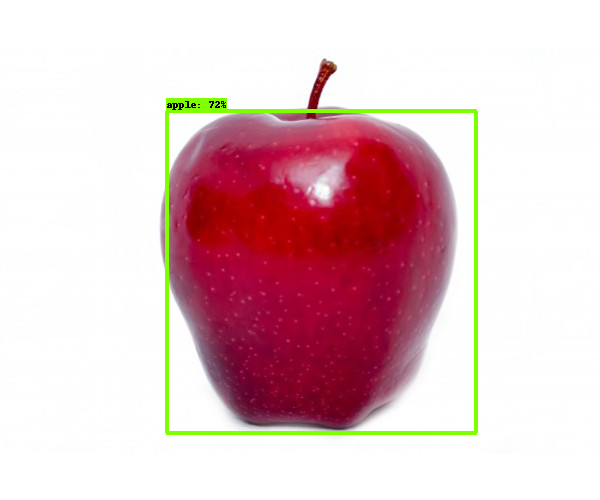

Running inference for /content/gdrive/MyDrive/Alegria-Object-Detection/TensorFlow/workspace/training_demo/images/test/orange_78.jpg... 

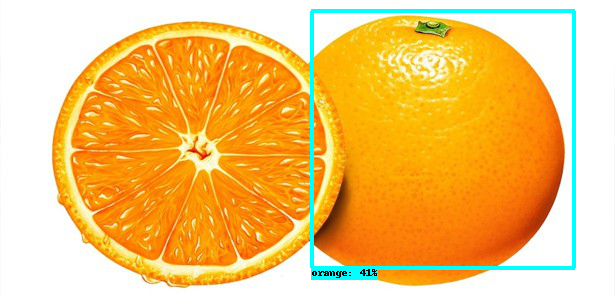

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

def load_image_into_numpy_array(path):
  return np.array(Image.open(path))

for image_path in img:
  print('Running inference for {}... '.format(image_path), end='')
  image_np=load_image_into_numpy_array(image_path)
  input_tensor=tf.convert_to_tensor(image_np)
  input_tensor=input_tensor[tf.newaxis, ...]
  detections=detect_fn(input_tensor)
  num_detections=int(detections.pop('num_detections'))
  detections={key:value[0,:num_detections].numpy()
                   for key,value in detections.items()}
  detections['num_detections']=num_detections
  detections['detection_classes']= detections['detection_classes'].astype(np.int64)
  image_np_with_detections=image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=100,     
          min_score_thresh=.3,      
          agnostic_mode=False)
  
  # %matplotlib inline
  # plt.figure()
  # plt.imshow(image_np_with_detections)
  # print('Done')
  # plt.show()

  imgout = Image.fromarray(image_np_with_detections, 'RGB')
  display(imgout)